Importing Libraries


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler

Reading and Exploring the Data Set


In [10]:
cd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [11]:
cd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
cd.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [13]:
cd.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
cd.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
cd.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
cd['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

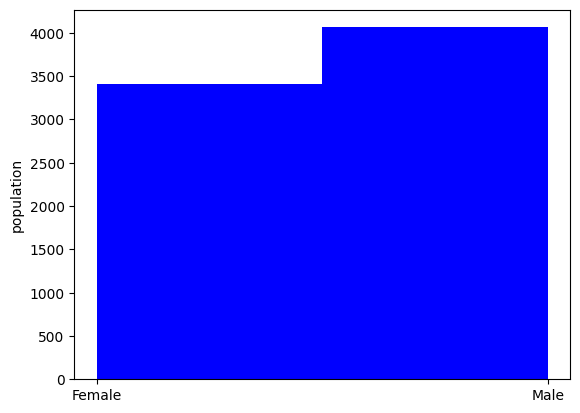

In [62]:
plt.hist(cd['Gender'],bins=2,color='blue')
plt.ylabel('population')
plt.show()

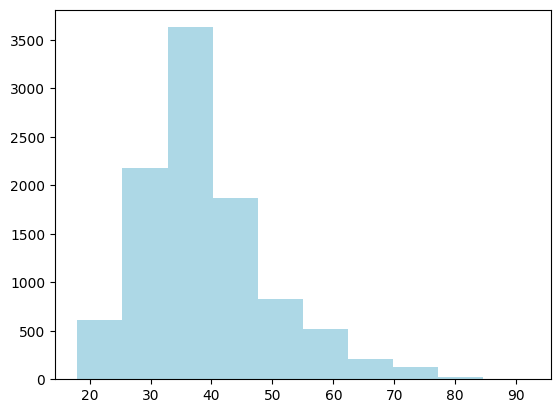

In [32]:
plt.hist(cd['Age'], color='lightblue');

In [40]:
r=cd['Geography'].value_counts()
r

Germany    2509
France     2493
Spain      2477
Name: Geography, dtype: int64

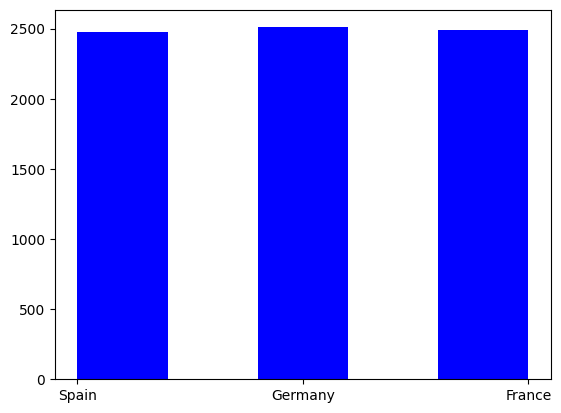

In [61]:
plt.hist(cd['Geography'],bins=5,color='blue');

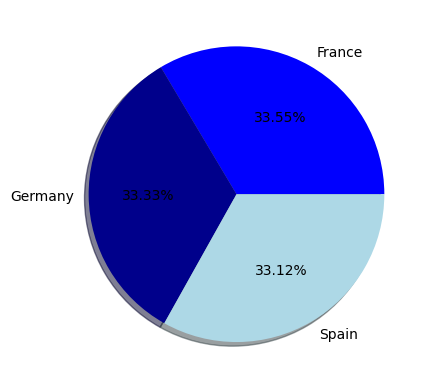

In [60]:
plt.pie(cd['Geography'].value_counts(), colors=['blue','darkblue','lightblue'], shadow=True,
       labels=['France','Germany','Spain'],
       autopct='%1.2f%%');

In [33]:
a = len(cd[(cd['Geography']=='France') & (cd['Exited']==1)])
b = len(cd[(cd['Geography']=='Germany') & (cd['Exited']==1)])
c = len(cd[(cd['Geography']=='Spain') & (cd['Exited']==1)])
print('Exited from France',a,'which is',a/d[0]*100,'%')
print('Exited from Germany',b,'which is',b/d[1]*100,'%')
print('Exited from Spain',c,'which is',c/d[2]*100,'%')

Exited from France 810 which is 16.15476665337056 %
Exited from Germany 814 which is 32.44320446392985 %
Exited from Spain 413 which is 16.673395236172787 %


In [34]:
cd_other = cd[cd['Geography']!='France']
len(cd_other)

4986

In [35]:
cd_france = cd[cd['Geography']=='France']
len(cd_france)

5014

In [36]:
cd_france = resample(cd_france, replace=False,
                     n_samples=int(np.mean([len(cd[cd['Geography']=='Germany']),len(cd[cd['Geography']=='Spain'])])))
len(cd_france)

2493

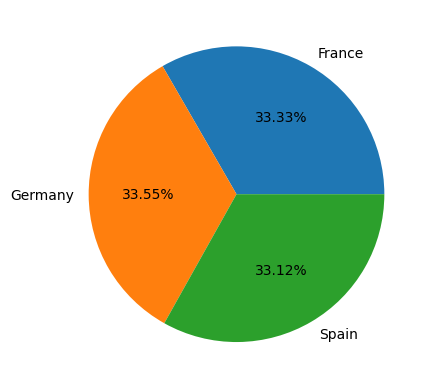

In [37]:
cd = pd.concat([cd_other,cd_france])
cd.groupby('Geography').size().plot(kind='pie', autopct='%1.2f%%');

In [50]:
t = cd['HasCrCard'].value_counts()
t

1    5252
0    2227
Name: HasCrCard, dtype: int64

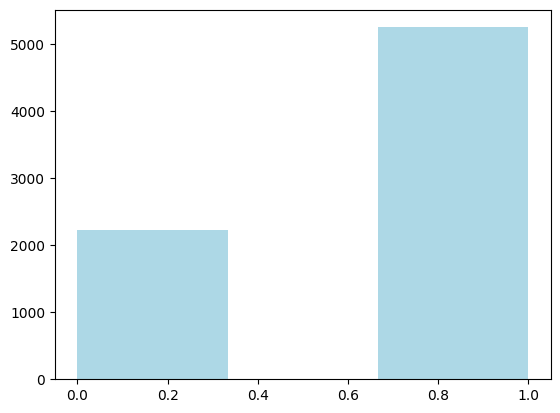

In [59]:
plt.hist(cd['HasCrCard'], bins=3, color='lightblue');

In [44]:
e = len(cd[(cd['HasCrCard']==1) & (cd['Exited']==1)])
f = len(cd[(cd['HasCrCard']==0) & (cd['Exited']==1)])
print('Exited having a credit card is',e,'which is',e/g[0]*100,'%')
print('Exited without having a credit card is',f,'which is',f/t[1]*100,'%')

Exited having a credit card is 1148 which is 51.549169286035024 %
Exited without having a credit card is 492 which is 9.367859862909368 %


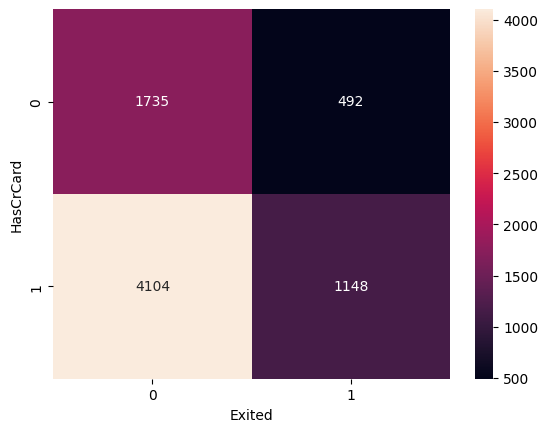

In [46]:
sb.heatmap(pd.crosstab(cd['HasCrCard'], cd['Exited']), annot=True, fmt='g'); #the fmt parameter is used to format
                                                                             #the annotations from scientific
                                                                             #notation to integers.

In [48]:
h = cd['IsActiveMember'].value_counts()
h

1    3819
0    3660
Name: IsActiveMember, dtype: int64

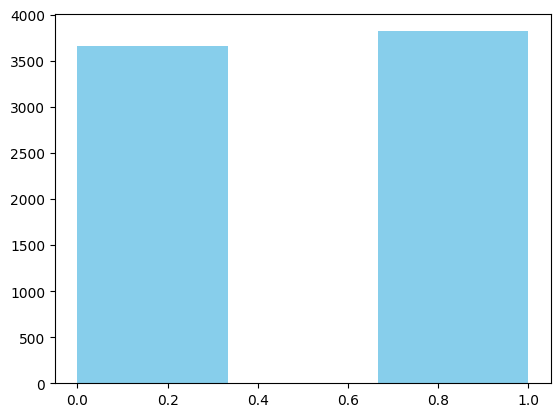

In [52]:
plt.hist(cd['IsActiveMember'], bins=3, color='skyblue');

In [53]:
i = len(cd[(cd['IsActiveMember']==1)&(cd['Exited']==1)])
j = i = len(cd[(cd['IsActiveMember']==0)&(cd['Exited']==1)])
print('Exited being an Active member',i,'which is',i/h[0]*100,'%')
print('Exited not being an Active member',j,'which is',j/h[1]*100,'%')

Exited being an Active member 1058 which is 28.90710382513661 %
Exited not being an Active member 1058 which is 27.70358732652527 %


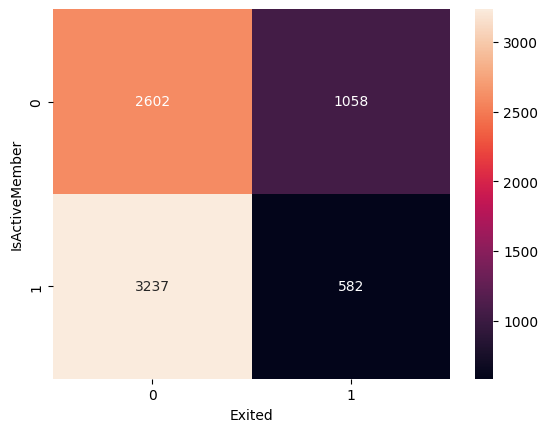

In [54]:
sb.heatmap(pd.crosstab(cd['IsActiveMember'], cd['Exited']), annot=True, fmt='g');

In [55]:
pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited'])

Exited                        0    1
Geography Gender HasCrCard          
France    Female 0          287   68
                 1          613  164
          Male   0          346   52
                 1          834  129
Germany   Female 0          219  131
                 1          526  317
          Male   0          262  106
                 1          688  260
Spain     Female 0          244   74
                 1          614  157
          Male   0          377   61
                 1          829  121

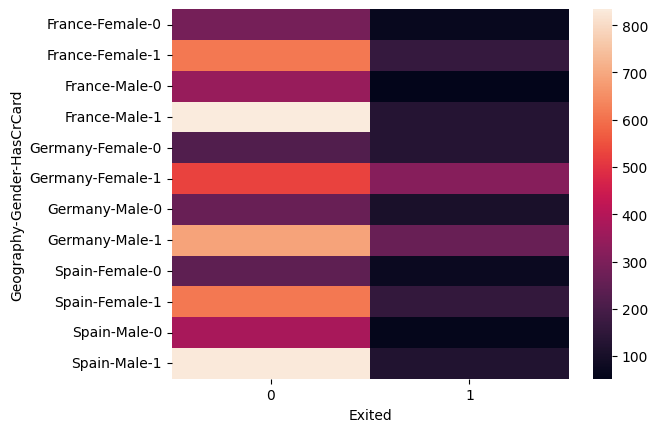

In [56]:
sb.heatmap(pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited']));

In [57]:
cd['Tenure'].value_counts()

2     785
8     776
1     774
3     757
5     754
7     748
4     741
9     736
6     711
10    381
0     316
Name: Tenure, dtype: int64

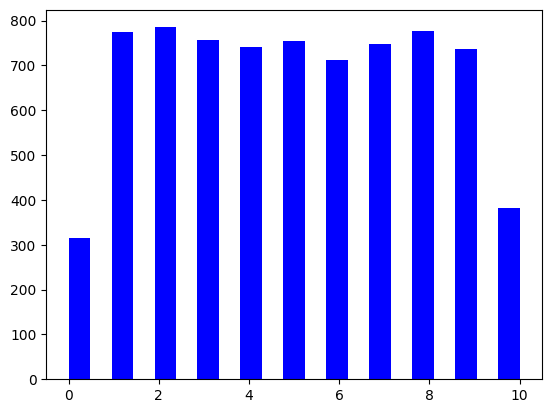

In [58]:
plt.hist(cd['Tenure'],bins=21,color='blue');

In [63]:
df_ten = cd[(cd['Tenure']==0) | (cd['Tenure']==10)]
df_others = cd[(cd['Tenure']!=0) | (cd['Tenure']!=10)]

In [64]:
df_ten['Tenure'].value_counts()

10    381
0     316
Name: Tenure, dtype: int64

In [65]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [66]:
df = pd.concat([df_ten, df_others])

In [67]:
df['Tenure'].value_counts()

2     785
8     776
1     774
3     757
5     754
7     748
4     741
9     736
6     711
10    602
0     495
Name: Tenure, dtype: int64

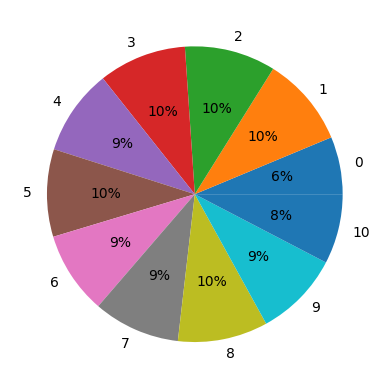

In [68]:
df.groupby('Tenure').size().plot(kind='pie', autopct='%1.0f%%');

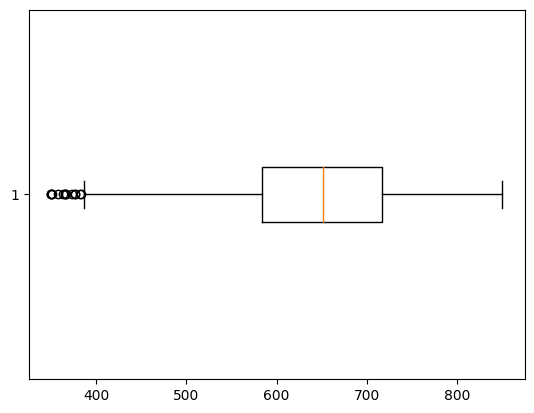

In [69]:
pt.boxplot(df['CreditScore'], vert=0); #outliers are seen to the left of the 400 mark.

In [70]:
df = df[df['CreditScore']>=390]

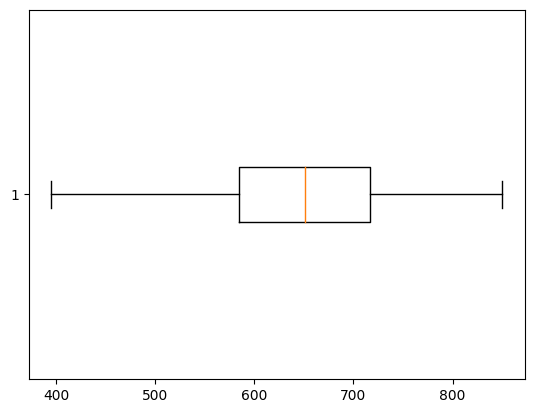

In [72]:
plt.boxplot(df['CreditScore'], vert=0);

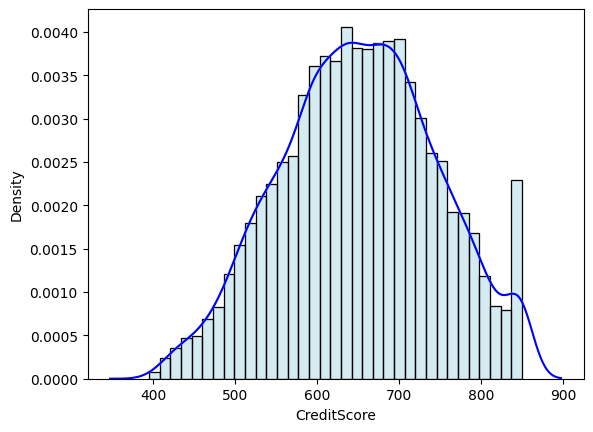

In [73]:
sb.histplot(df['CreditScore'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['CreditScore'], color='blue');

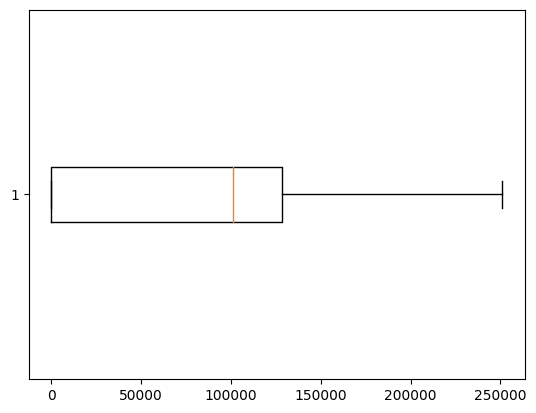

In [75]:
plt.boxplot(df['Balance'], vert=0); #shows negative skewness

In [76]:
df['Balance'].skew()

-0.2703701085207166

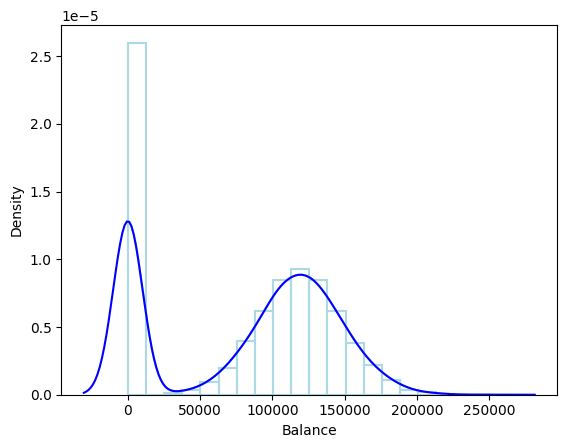

In [77]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density', fill=False)
sb.kdeplot(df['Balance'], color='blue');

In [78]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])
print("%.2f" %(a1/b1*100),'% of the data has 0 Balance.')

32.58 % of the data has 0 Balance.


In [79]:
df = df[df['Balance']!=0]

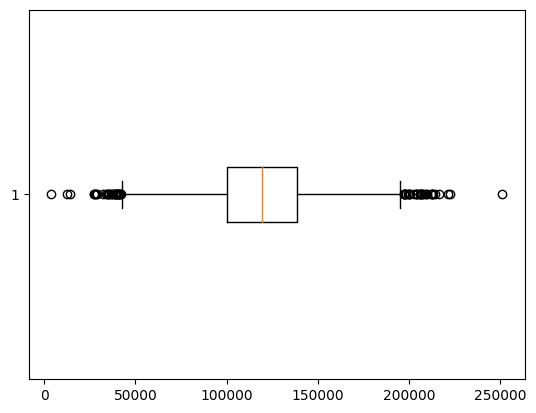

In [81]:
plt.boxplot(df['Balance'], vert=0);

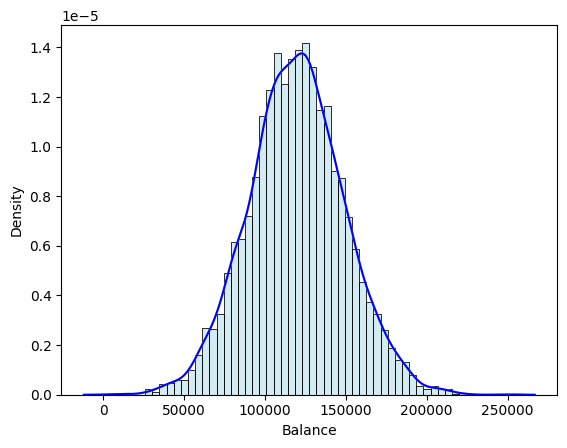

In [82]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['Balance'], color='blue');

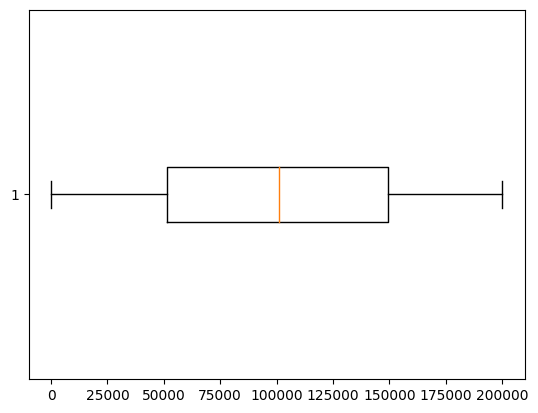

In [84]:
plt.boxplot(df['EstimatedSalary'], vert=0);

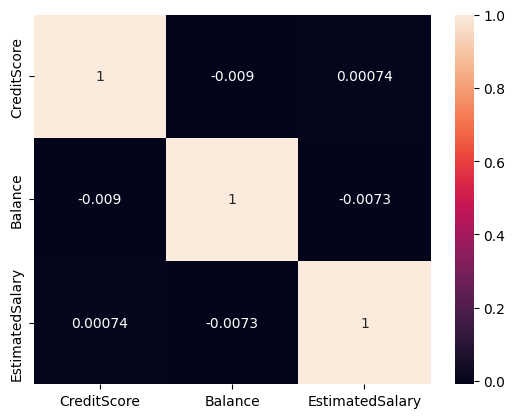

In [85]:
corr = df[['CreditScore','Balance','EstimatedSalary']]
corr = corr.corr()
sb.heatmap(corr, annot=True);

In [86]:
df['NumOfProducts'].value_counts()

1    3365
2    1752
3     148
4      37
Name: NumOfProducts, dtype: int64

In [87]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,2430,935
2,1528,224
3,10,138
4,0,37


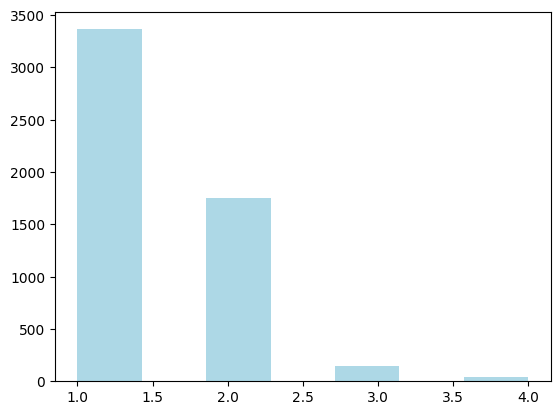

In [89]:
plt.hist(df['NumOfProducts'], bins=7, color='lightblue');

In [90]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [91]:
df['NumOfProducts'].value_counts()

1    3365
2    1752
3     148
Name: NumOfProducts, dtype: int64

In [92]:
#split into independent and dependent variables from here
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [93]:
x.shape

(5265, 10)

In [94]:
df_corr = df.corr(numeric_only=True)
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.010836,0.002989,-0.010842,0.010251,-0.023483,0.024780,0.001989,-0.014545
Age,-0.010836,1.000000,0.020200,0.010073,-0.024322,-0.018395,0.068037,-0.015256,0.293508
Tenure,0.002989,0.020200,1.000000,-0.005782,0.016376,0.046301,-0.055435,-0.006558,-0.006266
Balance,-0.010842,0.010073,-0.005782,1.000000,-0.008807,0.014136,-0.007561,-0.006399,0.007086
NumOfProducts,0.010251,-0.024322,0.016376,-0.008807,1.000000,0.014629,0.001845,0.027475,-0.003669
HasCrCard,-0.023483,-0.018395,0.046301,0.014136,0.014629,1.000000,-0.011837,0.004587,-0.000761
IsActiveMember,0.024780,0.068037,-0.055435,-0.007561,0.001845,-0.011837,1.000000,-0.018372,-0.172953
EstimatedSalary,0.001989,-0.015256,-0.006558,-0.006399,0.027475,0.004587,-0.018372,1.000000,0.001047
Exited,-0.014545,0.293508,-0.006266,0.007086,-0.003669,-0.000761,-0.172953,0.001047,1.000000


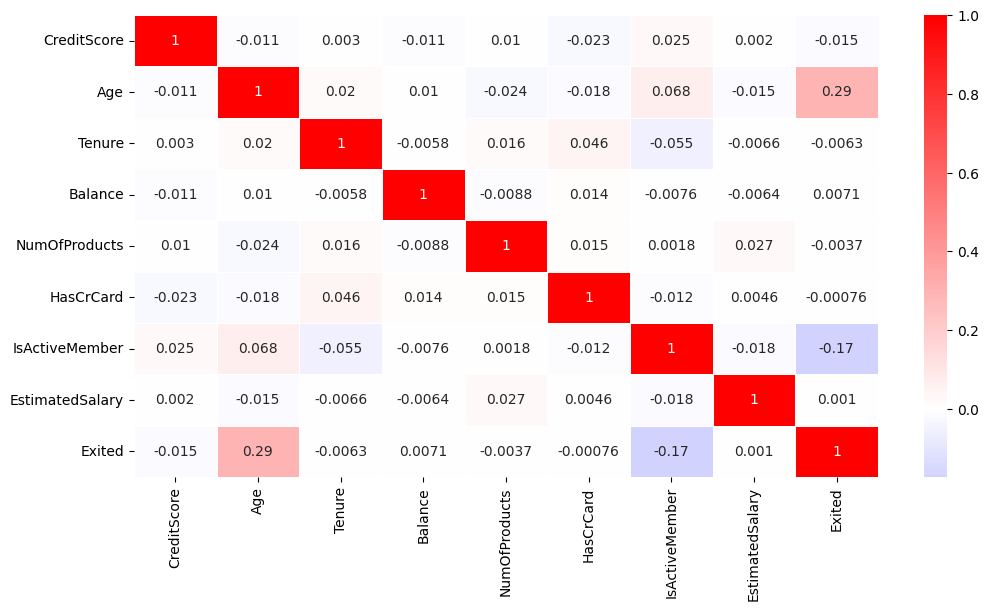

In [95]:
fig,ax = pt.subplots(figsize=(12,6))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0, cmap='bwr')
pt.show()

In [97]:
scale = scaler()
x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1682,0.494505,France,Male,0.310811,0,0.381000,1,1,0,0.425030
6729,0.129670,Germany,Female,0.432432,10,0.360649,1,1,0,0.771820
533,0.325275,Spain,Male,0.229730,10,0.225145,1,1,0,0.383888
4459,0.608791,Germany,Female,0.067568,10,0.432862,1,1,0,0.403917
1574,0.621978,Germany,Male,0.067568,10,0.452374,1,1,1,0.458203
...,...,...,...,...,...,...,...,...,...,...
6502,0.474725,France,Female,0.297297,2,0.494116,1,1,0,0.466054
2341,0.707692,France,Female,0.094595,7,0.424458,2,1,0,0.950195
9601,0.580220,France,Female,0.202703,7,0.348687,1,1,0,0.682782
2997,0.571429,France,Female,0.108108,7,0.414478,1,0,1,0.160077


In [98]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1682,0.494505,0.310811,0,0.381000,1,1,0,0.425030,1,0,0,0,1
6729,0.129670,0.432432,10,0.360649,1,1,0,0.771820,0,1,0,1,0
533,0.325275,0.229730,10,0.225145,1,1,0,0.383888,0,0,1,0,1
4459,0.608791,0.067568,10,0.432862,1,1,0,0.403917,0,1,0,1,0
1574,0.621978,0.067568,10,0.452374,1,1,1,0.458203,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,0.474725,0.297297,2,0.494116,1,1,0,0.466054,1,0,0,1,0
2341,0.707692,0.094595,7,0.424458,2,1,0,0.950195,1,0,0,1,0
9601,0.580220,0.202703,7,0.348687,1,1,0,0.682782,1,0,0,1,0
2997,0.571429,0.108108,7,0.414478,1,0,1,0.160077,1,0,0,1,0
